# Plotting code for the value of the option as a function of the stopping price

We load in the data created by the cpp script, and plot this.

Currently the cpp creatres two files, for different values of beta

In [12]:
import csv

S = []
V1 = []
V2 = []
with open('Varying_S_beta_1.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        S.append(float(row[0]))
        V1.append(float(row[1]))
        
with open('Varying_S_beta_425.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        V2.append(float(row[1]))

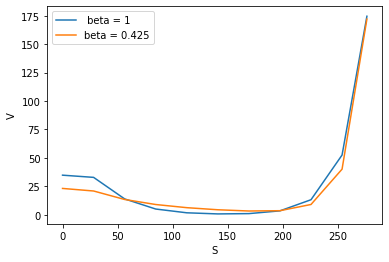

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(S,V1, label = " beta = 1")
plt.plot(S,V2, label = "beta = 0.425")

plt.xlabel("S")
plt.ylabel('V')
plt.legend()
plt.show()

Not sure whether this even makes sense, its a european call option so intital price should be lower then slowly increase? Unless high price at small S is due to getting the principle F?

At large S, both bonds should become similar, as they essentially only become dependent on RS, as this becomes increasingly likely to be the payout I believe.